### 1. 모델 생성 준비

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2S,preprocess_input
from tensorflow.keras.applications.xception import Xception,preprocess_input
from tensorflow.keras.applications import MobileNetV3Small

from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from time import perf_counter, sleep

In [ ]:
# Data augmentation(데이터 증대)
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=120, 
                                   horizontal_flip = True)
# width_shift_range=[-150, 150] 사진 자르기 ---- height_shift_range=[-150, 150] 높이 기준으로 자르기
# rotation_range=120 회전하기 ---- brightness_range=[0.1, 1.5] 색 바꾸기 0.1은 10%
# zoom_range=[0.3, 1.5] 확대 ---- shear_range=50 좌우 늘리기
print("start")

test_datagen = ImageDataGenerator(rescale = 1./255)

# 훈련/ 테스트 데이터 나누기
train_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/테스트용/train',
                                                 target_size = (224,224),
                                                #  target_size = (299,299),
                                                 batch_size = 32,
                                                #  batch_size = 128,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'/content/drive/MyDrive/테스트용/test',
                                            target_size = (224,224),
                                            # target_size = (299,299),
                                            batch_size = 32,
                                            # batch_size = 128,
                                            class_mode = 'categorical')

val_set = test_datagen.flow_from_directory(r'/content/drive/MyDrive/테스트용/val',
                                            target_size = (224,224),
                                            # target_size = (299,299),
                                            batch_size = 32,
                                            # batch_size = 128,
                                            class_mode = 'categorical')
print("end")

start
Found 221 images belonging to 8 classes.
Found 73 images belonging to 8 classes.
Found 73 images belonging to 8 classes.
end


In [ ]:
# InceptionResNetV2 모델 생성(가중치 : Imagenet사용)
# input_tensor = tf.keras.layers.Input(shape=(299, 299, 3)) 
input_tensor = tf.keras.layers.Input(shape=(224, 224, 3)) # Efficientnet_v2
# input_tensor = tf.keras.layers.Input(shape=(128, 128, 3)) # Efficientnet_v2
base_model = ResNet50(weights='imagenet', include_top=False,input_tensor=input_tensor)
# base_model = InceptionResNetV2(weights='imagenet', include_top=False)

# Freeze the layers
for layer in base_model.layers[:-2]:
    layer.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])

# # Add a GlobalAveragePooling layer
# x = base_model.output
# x = tf.keras.layers.GlobalAveragePooling2D()(x)
# # Add a fully connected layer for the classification
# x = Dense(1280, activation='relu')(x)
# # x = tf.keras.layers.Dropout(0.2)(x)
# x = Dense(320, activation='relu')(x)
# # x = tf.keras.layers.Dropout(0.2)(x)
# # fix a number of classes
# predictions = Dense(8, activation='softmax',)(x)

# Compile the model
model.compile(
    optimizer="adam",
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
print("1")

1


In [ ]:
# Train the model on the data
# Validation_data – 모델에 대한 손실 평가 및 메트릭에 대해 고려할 데이터입니다.
# Class_weight - 는 클래스의 사전 인덱스를 손실 함수 계산에 추가로 사용되는 해당 float 또는 weight 값으로 매핑하기 위한 선택적 매개변수입니다.
start = perf_counter()
history = model.fit_generator(train_set, epochs = 20, validation_data = val_set)
end = perf_counter()
print(f"Time : {end-start}")

<ipython-input-39-53723f3bb7fc>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_set, epochs = 20, validation_data = val_set)


Epoch 1/20
7/7 [==============================] - 17s 2s/step - loss: 2.1120 - accuracy: 0.1176 - val_loss: 2.0896 - val_accuracy: 0.1096
Epoch 2/20
7/7 [==============================] - 11s 2s/step - loss: 2.0869 - accuracy: 0.1176 - val_loss: 2.0803 - val_accuracy: 0.1233
Epoch 3/20
7/7 [==============================] - 11s 2s/step - loss: 2.0833 - accuracy: 0.1086 - val_loss: 2.0795 - val_accuracy: 0.1370
Epoch 4/20
7/7 [==============================] - 11s 2s/step - loss: 2.0801 - accuracy: 0.1403 - val_loss: 2.0791 - val_accuracy: 0.1370
Epoch 5/20
7/7 [==============================] - 11s 2s/step - loss: 2.0790 - accuracy: 0.1448 - val_loss: 2.0790 - val_accuracy: 0.1370
Epoch 6/20
7/7 [==============================] - 11s 2s/step - loss: 2.0790 - accuracy: 0.1448 - val_loss: 2.0789 - val_accuracy: 0.1370
Epoch 7/20
7/7 [==============================] - 11s 2s/step - loss: 2.0789 - accuracy: 0.1448 - val_loss: 2.0789 - val_accuracy: 0.1370
Epoch 8/20
7/7 [==================

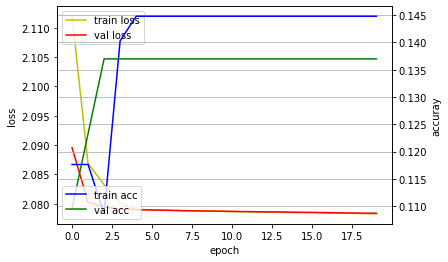

In [ ]:
import matplotlib.pyplot as plt
fig, loss = plt.subplots()

acc = loss.twinx()

loss.plot(history.history['loss'], 'y', label='train loss')
loss.plot(history.history['val_loss'], 'r', label='val loss')

acc.plot(history.history['accuracy'], 'b', label='train acc')
acc.plot(history.history['val_accuracy'], 'g', label='val acc')

loss.set_xlabel('epoch')
loss.set_ylabel('loss')
acc.set_ylabel('accuray')

loss.legend(loc='upper left')
acc.legend(loc='lower left')

plt.grid()
plt.show()

In [ ]:
# Evaluate the model on the test set
result= model.evaluate_generator(test_set) #test_loss, test_acc

<ipython-input-34-1107a8552b2a>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result= model.evaluate_generator(test_set) #test_loss, test_acc


In [ ]:
print('loss:', round(result[0]),f"({round(result[0] - last_loss, 5)})")
print('accuracy:', round(result[1], 5), f"({round(result[1] - last_accuracy, 5)})")

loss: 4531 (0.0)
accuracy: 0.12329 (0.0)


In [ ]:
last_loss = result[0]
last_accuracy = result[1]

NameError: ignored

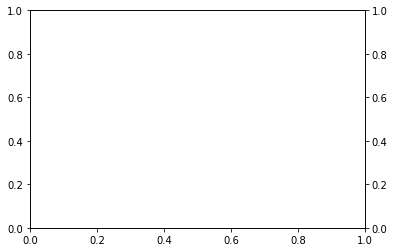

In [ ]:
def train_result_graph():
  import matplotlib.pyplot as plt
  fig, loss = plt.subplots()

  acc = loss.twinx()

  loss.plot(history.history['loss'], 'y', label='train loss')
  loss.plot(history.history['val_loss'], 'r', label='val loss')

  acc.plot(history.history['accuracy'], 'b', label='train acc')
  acc.plot(history.history['val_accuracy'], 'g', label='val acc')

  loss.set_xlabel('epoch')
  loss.set_ylabel('loss')
  acc.set_ylabel('accuray')

  loss.legend(loc='upper left')
  acc.legend(loc='lower left')

  plt.grid()
  plt.show()
train_result_graph()